In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
df = pd.read_csv("Dataset\loan_approval_dataset.csv")

In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [6]:
print(df.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [7]:
df["education"] = df["education"].str.strip() 

In [8]:
df["self_employed"] = df["self_employed"].str.strip()

In [9]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [10]:
df["education_status"] = df["education"].map({
    "Graduate": 1,
    "Not Graduate": 0
})

In [11]:
df["self_employed_status"] = df["self_employed"].map({
    "No":0,
    "Yes":1
})

In [12]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_status,self_employed_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,1,0
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,0,1
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,1,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,1,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,0,1


In [13]:
df["loan_status"] = df["loan_status"].str.strip() 

In [14]:
df["loan_status_"] = df["loan_status"].map({
    "Approved" : 1,
    "Rejected" : 0
})

In [15]:
df.drop(["loan_id","education","self_employed","loan_status"], axis = 1, inplace = True)

In [55]:
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_status,self_employed_status,loan_status_
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0


In [17]:
df.shape

(4269, 12)

In [18]:
df.loan_status_.value_counts()

loan_status_
1    2656
0    1613
Name: count, dtype: int64

In [19]:
df.isna().sum() 

no_of_dependents            0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
education_status            0
self_employed_status        0
loan_status_                0
dtype: int64

In [21]:
X = df.drop('loan_status_',axis='columns')
y = df['loan_status_']

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

loan_status_
1    2656
0    2656
Name: count, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size = 0.2,random_state = 16,stratify = y_sm)

In [29]:
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (4249, 11)
X_test : (1063, 11)
y_train : (4249,)
y_test : (1063,)


Model: GaussianNB
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       531
           1       0.95      0.84      0.89       532

    accuracy                           0.90      1063
   macro avg       0.90      0.90      0.90      1063
weighted avg       0.90      0.90      0.90      1063



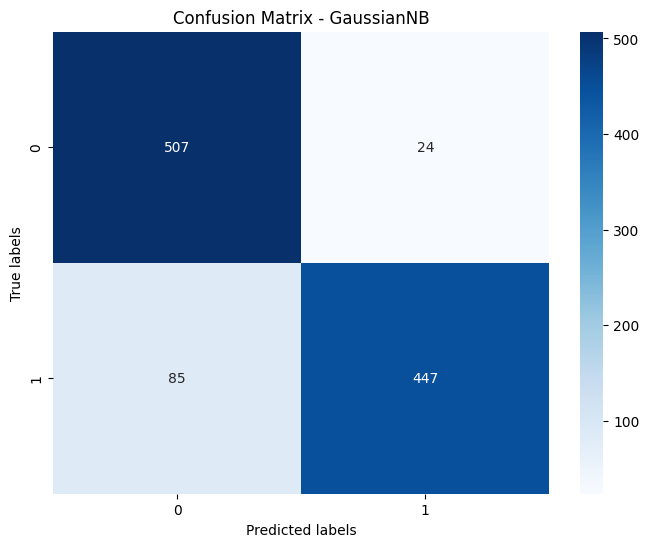

Model: LinearDiscriminantAnalysis
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       531
           1       0.99      0.88      0.93       532

    accuracy                           0.93      1063
   macro avg       0.94      0.93      0.93      1063
weighted avg       0.94      0.93      0.93      1063



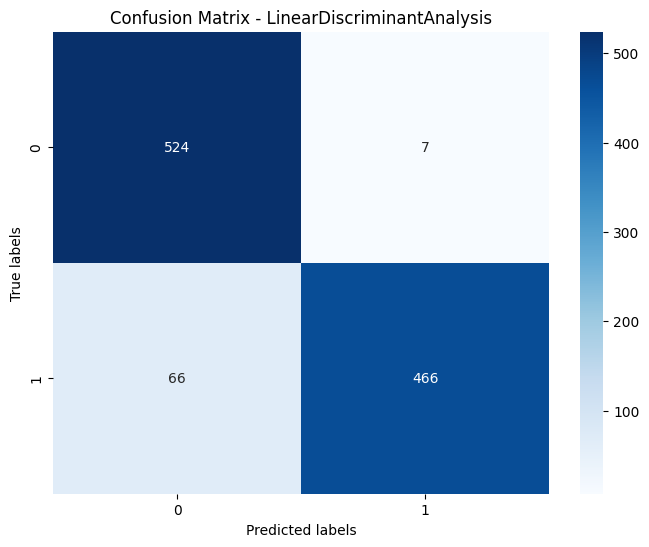

Model: QuadraticDiscriminantAnalysis
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       531
           1       0.98      0.92      0.95       532

    accuracy                           0.95      1063
   macro avg       0.95      0.95      0.95      1063
weighted avg       0.95      0.95      0.95      1063



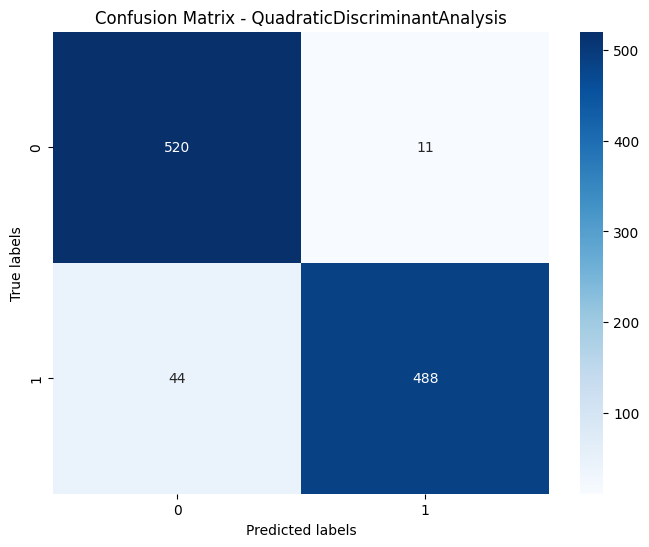

Model: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       531
           1       0.99      0.97      0.98       532

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063



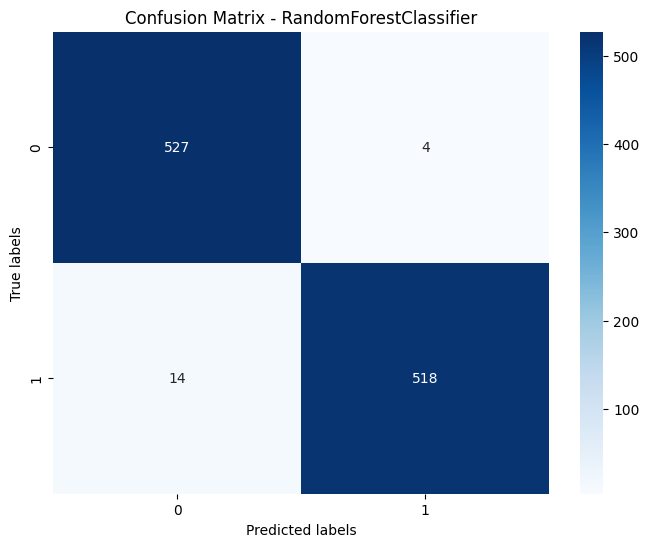

Model: GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       531
           1       0.99      0.98      0.99       532

    accuracy                           0.99      1063
   macro avg       0.99      0.99      0.99      1063
weighted avg       0.99      0.99      0.99      1063



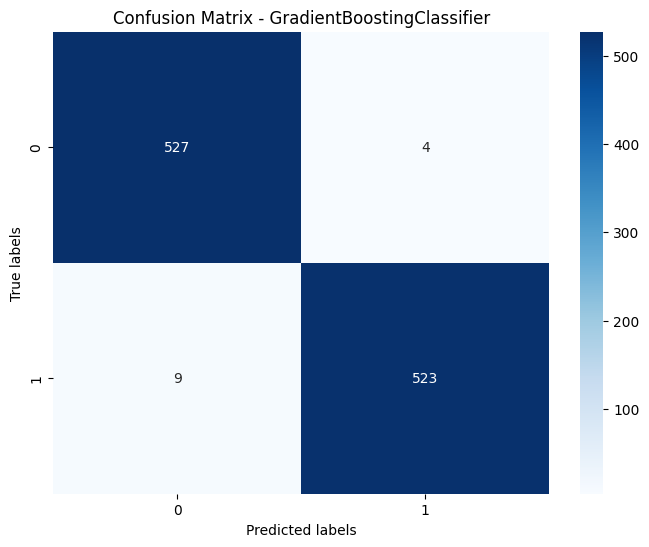

Model: XGBClassifier
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       531
           1       0.99      0.99      0.99       532

    accuracy                           0.99      1063
   macro avg       0.99      0.99      0.99      1063
weighted avg       0.99      0.99      0.99      1063



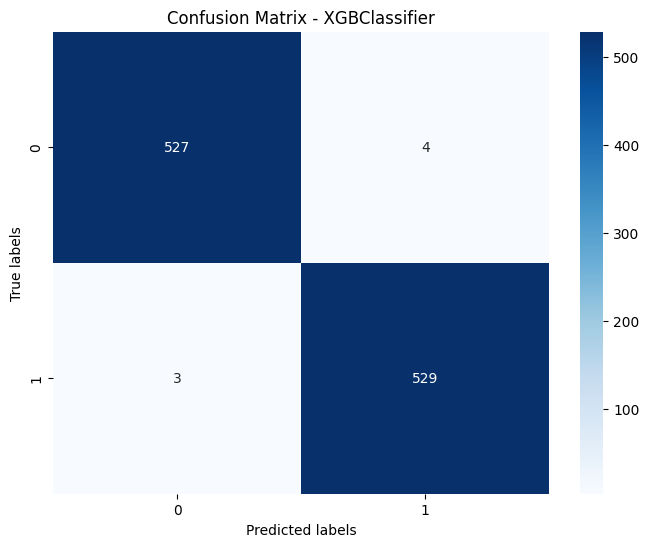

In [47]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def model_training(models, X_train, y_train, X_test, y_test):
    for model_class in models:
        model = model_class()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Model: {model_class.__name__}")
        print(classification_report(y_test, y_pred))
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        title = f"Confusion Matrix - {model_class.__name__}"
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title(title)
        plt.show()
        print("="*100)
    
models = [
    GaussianNB,
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
    RandomForestClassifier,
    GradientBoostingClassifier,
    XGBClassifier
]

# Assuming X_train, y_train, X_test, and y_test are already defined
model_training(models, X_train, y_train, X_test, y_test)

In [48]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

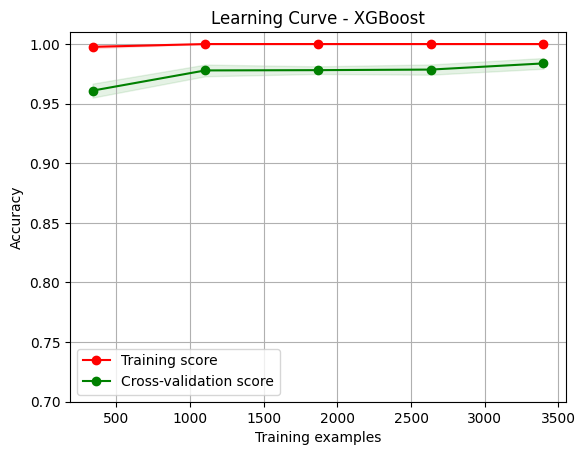

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise, it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# Plot learning curve
plot_learning_curve(xgb_model, "Learning Curve - XGBoost", X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()


In [57]:
import joblib as jbl
jbl.dump(xgb_model,"Loan_approval_prediction.joblib")

['Loan_approval_prediction.joblib']